# Analisis melihat paket prabayar yang paling banyak memberi pendapatan

Sebagai analis pada telekomunikasi Megaline, Diminta untuk menganalisa 2 paket prabayar yaitu: Surf dan Ultimate yang ditawarkan oleh perusahaan Megaline kepada klien yang mana yang paling menghasilkan pendapatan paling besar diantara 2 paket prabayar itu untuk menyesuaikan anggaran iklan.

Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Tugas Anda adalah untuk menganalisis perilaku klien dan menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan dengan sampel sebanyak 500 klien di Megaline dan memuat informasi klien yang berkaitan tentang penggunaan paket prabayar tersebut.

# Memuat seluruh Library dan Membaca filenya

## Memuat seluruh Library

In [ ]:
# Membuat semua Libary
import pandas as pd, numpy as np
# Memuat Data Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
# Membuat Uji Statistik
import scipy.stats as st

In [ ]:
# Membuat set kolom untuk kolom bisa dibaca jika panjang
pd.set_option('display.max_columns', 100)

## Memuat seluruh file

In [ ]:
# Memuat file calls
calls = pd.read_csv('/datasets/megaline_calls.csv')

In [ ]:
# Memuat file internet
internet = pd.read_csv('/datasets/megaline_internet.csv')

In [ ]:
# Memuat file messages
messages = pd.read_csv('/datasets/megaline_messages.csv')

In [ ]:
# Memuat file plans
plans = pd.read_csv('/datasets/megaline_plans.csv')

In [ ]:
# Memuat file users
users = pd.read_csv('/datasets/megaline_users.csv')

## Memuat informasi tabel Calls

- `id` — ID sesi web unik
- `user_id` — ID pengguna
- `call_date` — tanggal panggilan
- `duration` — durasi panggilan (dalam menit)

In [ ]:
# Melihat file tabel Calls
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [ ]:
# Melihat informasi keseluruhan pada tabel Calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
# Melihat distribusi data pada tabel calls
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [ ]:
# Melihat distribusi data kategorik pada tabel Calls
calls.describe(include='object')

,id,call_date
count,137735,137735
unique,137735,351
top,1361_1,2018-12-27
freq,1,1091


In [ ]:
# Mengecek nilai NaN pada tabel calls
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [ ]:
# Mengecek nilai duplikat pada tabel calls
calls.duplicated().sum()

0

- Pada Bagian Tabel Calls, Memiliki Jumlah baris sebanyak 137735 dan 4 kolom.
- Tidak ada nilai Null pada tabel Calls tersebut.
- Untuk kolom `user_id` dan `duration` yang memiliki nilai max lebih dari mean dan median harus di   cek lebih lanjut.
- Tidak ada nilai yang sama pada Tabel Tersebut.

## Memuat informasi tabel Internet

- `id` — ID sesi web unik
- `user_id` — ID pengguna
- `session_date` — tanggal sesi web
- `mb_used` — volume data yang dihabiskan selama sesi (dalam megabita)

In [ ]:
# Melihat file tabel Internet
internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [ ]:
# Melihat informasi keseluruhan pada tabel Internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
# Melihat distribusi data pada tabel Internet
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [ ]:
# Melihat distribusi data kategorik pada tabel Internet
internet.describe(include='object')

,id,session_date
count,104825,104825
unique,104825,351
top,1361_1,2018-12-24
freq,1,851


In [ ]:
# Mengecek nilai NaN pada tabel Internet
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [ ]:
# Mengecek nilai duplikat pada tabel Internet
internet.duplicated().sum()

0

- Pada Bagian Tabel Internet, Memiliki Jumlah baris sebanyak 104825 dan 4 kolom.
- Tidak ada nilai Null pada tabel Internet tersebut.
- Untuk kolom `user_id` dan `mb_used` yang memiliki nilai max lebih dari mean dan median harus di   cek lebih lanjut.
- Tidak ada nilai yang sama pada Tabel tersebut.

## Memuat informasi tabel Messages

- `id` — ID SMS unik
- `message_date` — tanggal SMS dikirim
- `user_id` — ID pengguna yang mengirim SMS

In [ ]:
# Melihat file tabel Messages
messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [ ]:
# Melihat informasi keseluruhan pada tabel Messages
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Melihat distribusi data pada tabel Messages
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [ ]:
# Melihat distribusi data kategorik pada tabel Messages
messages.describe(include='object')

,id,message_date
count,76051,76051
unique,76051,351
top,1124_74,2018-12-28
freq,1,702


In [ ]:
# Mengecek nilai NaN pada tabel Messages
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [ ]:
# Mengecek nilai duplikat pada tabel Messages
messages.duplicated().sum()

0

- Pada Bagian Tabel Messages, Memiliki Jumlah baris sebanyak 76051 dan 3 kolom.
- Tidak ada nilai Null pada tabel Messages tersebut.
- Untuk kolom `user_id`yang memiliki nilai max lebih dari mean dan median harus di cek lebih lanjut.
- Tidak ada nilai yang sama pada kolom tersebut.

## Memuat informasi tabel Plans

- `plan_name` — nama paket telepon
- `usd_monthly_fee` — biaya bulanan dalam dolar AS
- `minutes_included` — alokasi menit panggilan bulanan
- `messages_included` — alokasi SMS bulanan
- `mb_per_month_included` — alokasi volume data bulanan (dalam megabita)
- `usd_per_minute` — harga per menit jika telah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
- `usd_per_message` — harga per SMS jika telah melebihi batas alokasi paket
- `usd_per_gb` — harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita)

In [ ]:
# Melihat file tabel Plans
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
# Melihat informasi keseluruhan pada tabel Plans
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
# Melihat distribusi data pada tabel Plans
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [ ]:
# Melihat distribusi data kategorik pada tabel Plans
plans.describe(include='object')

,plan_name
count,2
unique,2
top,surf
freq,1


In [ ]:
# Mengecek nilai NaN pada tabel Plans
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [ ]:
# Mengecek nilai duplikat pada tabel Plans
plans.duplicated().sum()

0

- Pada Bagian Tabel Plans, Memiliki Jumlah baris sebanyak 2 dan 8 kolom.
- Tidak ada nilai Null pada Tabel Plans tersebut.
- Untuk kolom yang memiliki nilai max lebih dari mean dan median harus di cek lebih lanjut.
- Tidak ada nilai yang sama pada kolom tersebut.

## Memuat informasi tabel Users

- `user_id` — ID pengguna
- `first_name` — nama depan pengguna
- `last_name` — nama belakang pengguna
- `age — usia` pengguna (tahun)
- `reg_date` — tanggal mulai berlangganan (dd, mm, yy)
- `churn_date` — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat)
- `city` — kota tempat tinggal pengguna
- `plan` — nama paket telepon

In [ ]:
# Melihat file tabel Users
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [ ]:
# Melihat informasi keseluruhan pada tabel Users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# Melihat distribusi data pada tabel Users
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [ ]:
# Melihat distribusi data kategorik pada tabel Users
users.describe(include='object')

,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Jasper,Velazquez,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,2018-12-18
freq,3,3,80,5,339,3


In [ ]:
# Mengecek nilai NaN pada tabel Users
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [ ]:
# Mengecek nilai duplikat pada tabel Users
users.duplicated().sum()

0

- Pada Bagian Tabel Users, Memiliki Jumlah baris sebanyak 500 baris dan 8 kolom.
- Ada nilai Null pada kolom `churn_date` data Users, sehingga harus di cek lebih lanjut.
- Untuk kolom `user_id` dan `age` yang memiliki nilai max lebih dari mean dan median harus di cek lebih lanjut.
- Tidak ada nilai yang sama pada kolom tersebut.

# Pra-Pemrosesan Data

## Mengubah tipe data

### Mengubah tipe data tabel calls

In [ ]:
# Mengubah tipe data pada tabel call kolom call_date menjadi datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [ ]:
# Melihat kembali untuk kolom yang di ubah menjadi datetime
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Mengubah tipe data tabel internet

In [ ]:
# Mengubah tipe data pada tabel internet kolom sesstion_date menjadi datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [ ]:
# Melihat kembali untuk kolom yang di ubah menjadi datetime
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Mengubah tipe data tabel messages

In [ ]:
# Mengubah tipe data pada tabel messages kolom message_date menjadi datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [ ]:
# Melihat kembali untuk kolom yang di ubah menjadi datetime
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Mengubah tipe data tabel users

In [ ]:
# Mengubah tipe data pada tabel users kolom reg_date menjadi datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [ ]:
# Mengubah tipe data pada tabel users kolom churn_date menjadi datetime
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [ ]:
# Melihat kembali untuk kolom yang di ubah menjadi datetime
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## Mengisi nilai yang hilang

Karena saat memuat file ada nilai yang hilang maka dilakukan pengecekan lagi di sini terlebih dahulu.

In [ ]:
# Melihat jumlah nilai yang hilang pada tabel users
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [ ]:
# Melihat distribusi pada kolom churn_date
users[['churn_date']].describe()

/tmp/ipykernel_24/1083417593.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  users[['churn_date']].describe()


,churn_date
count,34
unique,29
top,2018-12-18 00:00:00
freq,3
first,2018-07-31 00:00:00
last,2018-12-31 00:00:00


Melihat nilai yang hilang pada kolom `churn_date` yang berjumlah 466 dari 500, artinya bahwa pelanggan masih banyak yang belum berhenti menggunakan layanan. Tetapi karena setiap pelanggan memiliki waktu yang berbeda-beda baik mengaktifkan, berhenti, atau memperpanjang layanan Maka saya membuat asumsi bahwa untuk mengisi nilai ini menggunakan nilai last yang dimana semua akan berhenti menggunakan layanan pada tanggal tanggal 31 bulan 12 tahun 2018.

Hal ini karena yang lebih masuk akal untuk saya, yang dimana para pelanggan menghentikan layanannya pada tanggal 31. Kalau menggunakan nilai modus saya menganggap masih di pertengahan bulan dan itu tidak masuk akal.

In [ ]:
# Mengisi nilai yang hilang denagn nilai max (tanggal terakhir yang biasanya para pelanggan
# mengentikan layanannya.)
new_churn_date = users['churn_date'].max()
users['churn_date'] =users['churn_date'].fillna(new_churn_date)

In [ ]:
# Mengecek jumlah nilai yang hilang pada tabel users
users.isna().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

In [ ]:
# Melihat tabelnya
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31


setelah mengisi nilai yang hilang, dan mengecek lagi bahwa semua nilai di kolom `churn_date` sudah terisi semua.

## Melihat nilai value

melihat dan memeriksa value dalam kolom yang pada masing-masing tabel apakah ada huruf yang keliru pada kapital atau kasus sejenis lainnya.

### Melihat nilai value tabel Plans

In [ ]:
# Melihat dan memeriksa nilai value pada kolom plan_name
plans['plan_name'].unique()

array(['surf', 'ultimate'], dtype=object)

### Melihat nilai value tabel Plans

In [ ]:
# Melihat dan memeriksa nilai value pada kolom first_name
users['first_name'].sort_values().unique()

array(['Aaron', 'Abraham', 'Adelle', 'Adena', 'Al', 'Alaine', 'Alan',
       'Alec', 'Alejandro', 'Alfredo', 'Alia', 'Allegra', 'Alphonse',
       'Amal', 'Anamaria', 'Anderson', 'Andre', 'Andrew', 'Andy',
       'Anette', 'Angeles', 'Angelic', 'Anjelica', 'Annice', 'Antoine',
       'Antonetta', 'Ardelia', 'Arianna', 'Ariel', 'Arlen', 'Arlie',
       'Armand', 'Arturo', 'Assunta', 'Asuncion', 'Augustus', 'Avril',
       'Azucena', 'Barney', 'Beata', 'Bernard', 'Bert', 'Billy', 'Bo',
       'Booker', 'Boris', 'Boyd', 'Brian', 'Brice', 'Britni', 'Brock',
       'Bryon', 'Burt', 'Carl', 'Carlee', 'Carlos', 'Casie', 'Cassey',
       'Charlesetta', 'Charlsie', 'Charmain', 'Chase', 'Chau', 'Cherlyn',
       'Ching', 'Cicely', 'Clarence', 'Clarine', 'Claude', 'Clementina',
       'Cleo', 'Cleora', 'Collin', 'Cortez', 'Damion', 'Darcey',
       'Darnell', 'Darrin', 'Darron', 'Deandre', 'Deane', 'Deja',
       'Delila', 'Delmar', 'Deloras', 'Delpha', 'Demarcus', 'Demetrius',
       'Denis', 'D

In [ ]:
# Melihat dan memeriksa nilai value pada kolom last_name
users['last_name'].sort_values().unique()

array(['Acevedo', 'Adkins', 'Aguilar', 'Albert', 'Allen', 'Alvarado',
       'Anderson', 'Andrews', 'Arnold', 'Ashley', 'Atkins', 'Atkinson',
       'Avery', 'Baird', 'Baker', 'Baldwin', 'Ball', 'Banks', 'Barker',
       'Barnes', 'Barr', 'Barrera', 'Barrett', 'Barry', 'Bates', 'Bauer',
       'Beach', 'Bean', 'Bell', 'Bennett', 'Benton', 'Berry', 'Blair',
       'Bolton', 'Bonner', 'Booker', 'Bowers', 'Bowman', 'Bradford',
       'Bradshaw', 'Branch', 'Brock', 'Brooks', 'Browning', 'Bryant',
       'Buchanan', 'Burgess', 'Burke', 'Burnett', 'Burris', 'Burt',
       'Byrd', 'Cabrera', 'Cain', 'Caldwell', 'Calhoun', 'Camacho',
       'Cameron', 'Cardenas', 'Carney', 'Carpenter', 'Carrillo', 'Carson',
       'Carver', 'Cash', 'Castaneda', 'Chambers', 'Chan', 'Chandler',
       'Clayton', 'Cline', 'Cohen', 'Cole', 'Coleman', 'Colon', 'Compton',
       'Conley', 'Conner', 'Conrad', 'Contreras', 'Conway', 'Cooke',
       'Cooley', 'Cortez', 'Cotton', 'Craig', 'Crawford', 'Cross',
       'Cu

In [ ]:
# Melihat dan memeriksa nilai value pada kolom city
users['city'].sort_values().unique()

array(['Albany-Schenectady-Troy, NY MSA', 'Albuquerque, NM MSA',
       'Atlanta-Sandy Springs-Roswell, GA MSA',
       'Austin-Round Rock-Georgetown, TX MSA', 'Bakersfield, CA MSA',
       'Baltimore-Columbia-Towson, MD MSA', 'Baton Rouge, LA MSA',
       'Birmingham-Hoover, AL MSA', 'Boston-Cambridge-Newton, MA-NH MSA',
       'Bridgeport-Stamford-Norwalk, CT MSA',
       'Buffalo-Cheektowaga, NY MSA', 'Cape Coral-Fort Myers, FL MSA',
       'Charleston-North Charleston, SC MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'Cincinnati, OH-KY-IN MSA', 'Cleveland-Elyria, OH MSA',
       'Colorado Springs, CO MSA', 'Columbia, SC MSA', 'Columbus, OH MSA',
       'Dallas-Fort Worth-Arlington, TX MSA', 'Dayton-Kettering, OH MSA',
       'Denver-Aurora-Lakewood, CO MSA',
       'Detroit-Warren-Dearborn, MI MSA', 'El Paso, TX MSA',
       'Fresno, CA MSA', 'Grand Rapids-Kentwood, MI MSA',
       'Greensboro-High Point, NC MSA',
    

Setelah melihat dan mengcek pada masing-masing unique value di semua tabel yang mempunya tipe data object bahwa tidak ada kesalah untuk unique valuenya.

## Menambah kolom baru berisi bulan pada setiap tabel yang membutuhkan dan menghilang nilai desimal

### Menambah kolom baru berisi bulan

Karena diminta datanya setiap per bulan untuk masing-masing panggilan, sms, dan data. Maka perlu penambahan kolom yang menjelaskan bulan dari para pelanggan.

In [ ]:
# Membuat fungsi jadi bulan tahun dengan tipe data period
def get_month(dataset, col_name):
    temp = pd.to_datetime(dataset[col_name])
    temp = temp.dt.to_period("M")
    return temp

In [ ]:
# bikin kolom month di tabel calls
calls['month'] = get_month(calls, 'call_date')
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


In [ ]:
# bikin kolom month di tabel internet (jumlah data yang digunakan)
internet['month'] = get_month(internet, 'session_date')
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


In [ ]:
# bikin kolom month di tabel messages / pesan
messages['month'] = get_month(messages, 'message_date')
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


semua tabel yang membutuhkan informasi berupa kolom `month` sudah dilakukan, sehingga bisa di lakukan proses selanjutnya yang membutuhkan kolom dari masing-masing tabel tersebut.

### Membuat kolom untuk menghitung jumlah bulan langganan

In [ ]:
# Membuat fungsi untuk mengitung perbedaan bulan 
def total_bulan(a, b):
    return (12 * (a.dt.year - b.dt.year)) + (a.dt.month - b.dt.month)

In [ ]:
# Menjalan fungsi dengan membuat kolom baru
users['total_month'] = total_bulan(users['churn_date'], users['reg_date'])

In [ ]:
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,total_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,4
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,2
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,11
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,7
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31,3
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31,10
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31,0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,10


Saat di cek ternayta ada jumlah total bulan yang masih 0, sebaiknya untuk mengecek bagaimana yang langganannya masih 0 ada pada tabel `users`

In [ ]:
# Mengecek kolom total_month yang nilainya 0
users.loc[users['total_month']==0]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,total_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,0
13,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,2018-12-31,0
15,1015,Beata,Carpenter,26,"Pittsburgh, PA MSA",2018-12-05,surf,2018-12-31,0
21,1021,Ricarda,Booker,37,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-21,surf,2018-12-31,0
35,1035,Jeff,Cummings,67,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-12-08,surf,2018-12-31,0
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30,0
51,1051,Rosario,Gibbs,55,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-12-11,surf,2018-12-31,0
92,1092,Taren,Strickland,26,"Dallas-Fort Worth-Arlington, TX MSA",2018-12-10,surf,2018-12-31,0
93,1093,Karima,Hampton,69,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-12-17,surf,2018-12-31,0
96,1096,Song,Cline,28,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-22,ultimate,2018-12-31,0


tidak mungkin nilai itu 0, sebenarnya itu sudah langganan. Hal yang terbaik mengganti nilai 0 ini menjadi 1. Karena bagiamanapun pelanggan itu sudah membeli paket untuk 1 bulan kedepan, maka kita ubah menjadi 1.

In [ ]:
# Mengubah nilai 0 menjadi 1 untuk pelanggan yang berlangganan kurang dari 1 bulan
users.loc[users['total_month'] == 0, 'total_month'] = 1

In [ ]:
# Mengecek kembali kolom total_month yang nilainya 0
users.loc[users['total_month']==0]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,total_month


### Menghilangkan nilai desimal

Karena diminta untuk membulatkan keatas untuk durasi panggilan yang lebih dari 1 detik pada kolom `duration` di tabel calls. 

In [ ]:
# Membulatkan nilai pada kolom duration di tabel calls
calls['duration'] = np.ceil(calls['duration'])

In [ ]:
# Melihat kembali nilai di kolom duration pada tabel calls
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,2018-12
1,1000_145,1000,2018-12-27,14.0,2018-12
2,1000_247,1000,2018-12-27,15.0,2018-12
3,1000_309,1000,2018-12-28,6.0,2018-12
4,1000_380,1000,2018-12-30,5.0,2018-12


## Membuat kolom untuk kota NY-NJ

Karena diminta untuk membandingkan pelanggan yang digunakan pada kota NY-NJ dan selain NY-NJ, maka perlu kolom untuk mengidentifikasi atnara kota NY-NJ dan kota selain itu.

In [ ]:
# Membuat kolom baru dengan identifikasi kota saja
users['clean_city'] = users['city'].str.split(', ').str[1]
users['clean_city'] = users['clean_city'].str.replace(' MSA', '')

In [ ]:
# Membuat kolom untuk mengidentifikasi apakh ada NY-NJ atau tidaknya.
users['is_ny_nj'] = users['clean_city'].str.contains('NY-NJ', regex=True)

In [ ]:
# Melihat kolom baru
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,1,GA,False
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,4,WA,False
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,2,NV,False
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,11,OK,False
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,7,WA,False


In [ ]:
# Melihat kolom yang ada NY-NJ dan True
users.loc[users['is_ny_nj'] == True]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,2018-12-31,1,NY-NJ-PA,True
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,5,NY-NJ-PA,True
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,2018-12-31,4,NY-NJ-PA,True
27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,2018-12-31,6,NY-NJ-PA,True
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,2018-12-31,5,NY-NJ-PA,True
...,...,...,...,...,...,...,...,...,...,...,...
469,1469,Rory,Nixon,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,2018-12-31,6,NY-NJ-PA,True
482,1482,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,2018-12-31,11,NY-NJ-PA,True
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,2018-12-31,8,NY-NJ-PA,True
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31,3,NY-NJ-PA,True


## Aggregasi data

Karena diminta untuk mengidentifikasi data pada tahap selanjutnya menjadi per-bulan maka perlu proses untuk di aggregasi terlebih dahulu

### Aggregasi tabel calls

In [ ]:
# Aggregasi tabel calls untuk durasi
agg_calls = pd.pivot_table(calls, index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()

In [ ]:
# Melihat variabel aggregasi untuk tabel calls
agg_calls

,user_id,month,duration
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
...,...,...,...
2253,1498,2018-12,339.0
2254,1499,2018-09,346.0
2255,1499,2018-10,385.0
2256,1499,2018-11,308.0


### Aggregasi tabel messages

In [ ]:
# Aggregasi tabel messages untuk total messages
agg_messages = pd.pivot_table(messages, index=['user_id', 'month'], values='message_date', aggfunc='count').reset_index() 
# agg_messages = messages.groupby(['user_id', 'month']).count().reset_index()

In [ ]:
# Melihat variabel aggregasi untuk tabel messages
agg_messages

,user_id,month,message_date
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


Karena ada nilai yang sama di id dam message_date yang sama-sama nilai jumlah pesannya, maka harus di rapihkan terlebih dahulu.

In [ ]:
# Merapihkan, eleminasi kolom-kolom yang diperlukan saja
agg_messages = agg_messages[['user_id', 'month', 'message_date']]
agg_messages.columns = ['user_id', 'month', 'messages']

In [ ]:
# Melihat variabel aggregasi untuk tabel calls yang sudah diperbaiki
agg_messages

,user_id,month,messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


### Aggregasi tabel internet

In [ ]:
# Aggregasi tabel calls untuk valome data
agg_internet = pd.pivot_table(internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()

In [ ]:
# Melihat variabel aggregasi untuk tabel internet
agg_internet

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


## Menggabungkan semua variabel

Setelah selesai dengan semua hal yang dibutuhkan selama pramrosesan data berlangsung, perlu disatukan menjadi satu tabel/varibel baru agar lebih mudah untuk pemrosesan di eksplorasi data pada tahap selanjutnya.

In [ ]:
# Membuat variabel baru dari gabungan beberapa tabel/variabel
df = agg_calls.merge(agg_messages, how='outer', on=['user_id', 'month'])
df = df.merge(agg_internet, how='outer', on=['user_id', 'month'])
df = df.merge(users, how='outer', on=['user_id'])
df = df.merge(plans, how='left', left_on='plan', right_on='plan_name')

In [ ]:
# cek dataset terbaru hasil gabungan
df.head(5)

,user_id,month,duration,messages,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,1,GA,False,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,2018-08,182.0,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,surf
2,1001,2018-09,315.0,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,surf
3,1001,2018-10,393.0,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,surf
4,1001,2018-11,426.0,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,surf


In [ ]:
df.columns

Index(['user_id', 'month', 'duration', 'messages', 'mb_used', 'first_name',
       'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date',
       'total_month', 'clean_city', 'is_ny_nj', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name'],
      dtype='object')

Setelah digabung menjadi tabel baru sepertinya terlalu panjang karena ada kolom yang tidak dibutuhkan. Jadi akan mengambil kolom yang dibutuhkan untuk menganailisa di tahap ekplorasi data.

In [ ]:
# Mengambil dan merapihkan kolom-kolom yang diperlukan
df = df[['user_id', 'duration', 'messages', 'mb_used', 
                    'reg_date', 'plan', 'churn_date', 'total_month', 'clean_city', 'is_ny_nj',
                    'messages_included', 'mb_per_month_included', 'minutes_included',
                    'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']]

In [ ]:
# Melihat dataset yang baru
df.head(5)

,user_id,duration,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,124.0,11.0,1901.47,2018-12-24,ultimate,2018-12-31,1,GA,False,1000,30720,3000,70,7,0.01,0.01
1,1001,182.0,30.0,6919.15,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03
2,1001,315.0,44.0,13314.82,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03
3,1001,393.0,53.0,22330.49,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03
4,1001,426.0,36.0,18504.30,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03


## Memperbaiki nilai dan Menambah kolom di tabel/variabel baru

### Memperbaiki nilai

Ternyata setelah di cek, ada nilai NaN pada dataset yang baru, perlu analisa lebih lanjut untuk melihatnya.

In [ ]:
# Melihat jumlah sum untuk masing-masing kolom
df.isna().sum()

user_id                    0
duration                  45
messages                 497
mb_used                   26
reg_date                   0
plan                       0
churn_date                 0
total_month                0
clean_city                 0
is_ny_nj                   0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
dtype: int64

Di sini nilai NaN yang paling banyak adalah `messages` lalu ada `duration` (durasi telepon dalam paket) dan `mb_use`(jumlah voluma/kuota data yang terpakai). Perlu meilhat baris yang nilainya NaN pada ketiga kolom tersebut. Untuk memastikan bagaimana nilai yang NaN ini di putuskan agar tidak merusak saat tahap ekslorasi data.

In [ ]:
# Melihat persebaran data pada dataset baru
df.describe()

,user_id,duration,messages,mb_used,total_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2303.000000,2258.000000,1806.000000,2277.000000,2303.000000,2303.00000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,1246.214937,435.937555,42.110188,16882.197501,7.008684,348.65393,20188.762484,1285.931394,35.718628,9.056882,0.023713,0.023713
std,143.044136,231.972343,33.122931,7869.784848,2.932326,441.14801,7132.666777,1160.915817,23.218316,1.393099,0.009287,0.009287
min,1000.000000,0.000000,1.000000,92.310000,1.000000,50.00000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000
25%,1122.000000,275.000000,17.000000,12347.720000,5.000000,50.00000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000
50%,1245.000000,429.000000,34.000000,16873.740000,7.000000,50.00000,15360.000000,500.000000,20.000000,10.000000,0.030000,0.030000
75%,1368.000000,574.750000,59.000000,21041.520000,10.000000,1000.00000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000
max,1499.000000,1510.000000,266.000000,70931.590000,11.000000,1000.00000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000


In [ ]:
# Melihat nilai yang hilang pada kolom messages
df.loc[df['messages'].isna()]

,user_id,duration,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
29,1009,534.0,NaN,20389.40,2018-04-22,surf,2018-12-31,8,CA,False,50,15360,500,20,10,0.03,0.03
30,1009,823.0,NaN,18845.90,2018-04-22,surf,2018-12-31,8,CA,False,50,15360,500,20,10,0.03,0.03
31,1009,880.0,NaN,30421.65,2018-04-22,surf,2018-12-31,8,CA,False,50,15360,500,20,10,0.03,0.03
32,1009,731.0,NaN,24557.52,2018-04-22,surf,2018-12-31,8,CA,False,50,15360,500,20,10,0.03,0.03
33,1009,776.0,NaN,20962.40,2018-04-22,surf,2018-12-31,8,CA,False,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,2018-12-31,surf,2018-12-31,1,MA-NH,False,50,15360,500,20,10,0.03,0.03
2299,1319,NaN,NaN,NaN,2018-06-17,surf,2018-12-31,6,CO,False,50,15360,500,20,10,0.03,0.03
2300,1378,NaN,NaN,NaN,2018-12-17,surf,2018-12-31,1,CO,False,50,15360,500,20,10,0.03,0.03
2301,1463,NaN,NaN,NaN,2018-11-27,ultimate,2018-12-31,1,GA,False,1000,30720,3000,70,7,0.01,0.01


In [ ]:
# Melihat jenis paket yang digunakan untuk nilai hilang pada kolom messages
xm = df.loc[df['messages'].isna()]
xm['plan'].value_counts()

surf        357
ultimate    140
Name: plan, dtype: int64

In [ ]:
# Melihat nilai yang hilang pada kolom duration
df.loc[df['duration'].isna()]

,user_id,duration,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
104,1028,NaN,12.0,12591.91,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01
1045,1224,NaN,5.0,2966.21,2018-06-28,ultimate,2018-12-31,6,GA,False,1000,30720,3000,70,7,0.01,0.01
1398,1311,NaN,NaN,1498.83,2018-06-27,ultimate,2018-12-31,6,TN-MS-AR,False,1000,30720,3000,70,7,0.01,0.01
1645,1361,NaN,2.0,1519.69,2018-04-14,surf,2018-12-31,8,AL,False,50,15360,500,20,10,0.03,0.03
2182,1482,NaN,2.0,NaN,2018-01-01,ultimate,2018-12-31,11,NY-NJ-PA,True,1000,30720,3000,70,7,0.01,0.01
2263,1080,NaN,31.0,20519.74,2018-08-03,surf,2018-12-31,4,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03
2264,1080,NaN,64.0,25499.72,2018-08-03,surf,2018-12-31,4,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03
2265,1080,NaN,59.0,30161.57,2018-08-03,surf,2018-12-31,4,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03
2266,1080,NaN,50.0,33559.88,2018-08-03,surf,2018-12-31,4,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03
2267,1080,NaN,61.0,24543.42,2018-08-03,surf,2018-12-31,4,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03


In [ ]:
# Melihat jenis paket yang digunakan untuk nilai hilang pada kolom duration
xd = df.loc[df['duration'].isna()]
xd['plan'].value_counts()

surf        34
ultimate    11
Name: plan, dtype: int64

In [ ]:
# Melihat nilai yang hilang pada kolom mb_used
df.loc[df['mb_used'].isna()]

,user_id,duration,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
175,1044,13.0,NaN,NaN,2018-08-30,surf,2018-12-31,4,NM,False,50,15360,500,20,10,0.03,0.03
1028,1222,14.0,2.0,NaN,2018-06-27,surf,2018-12-31,6,CA,False,50,15360,500,20,10,0.03,0.03
1546,1340,46.0,8.0,NaN,2018-07-05,surf,2018-12-31,5,TX,False,50,15360,500,20,10,0.03,0.03
1548,1340,441.0,62.0,NaN,2018-07-05,surf,2018-12-31,5,TX,False,50,15360,500,20,10,0.03,0.03
1797,1393,71.0,4.0,NaN,2018-10-29,surf,2018-12-31,2,TN,False,50,15360,500,20,10,0.03,0.03
2133,1470,240.0,51.0,NaN,2018-04-21,surf,2018-12-31,8,DC-VA-MD-WV,False,50,15360,500,20,10,0.03,0.03
2134,1470,565.0,133.0,NaN,2018-04-21,surf,2018-12-31,8,DC-VA-MD-WV,False,50,15360,500,20,10,0.03,0.03
2135,1470,524.0,147.0,NaN,2018-04-21,surf,2018-12-31,8,DC-VA-MD-WV,False,50,15360,500,20,10,0.03,0.03
2136,1470,580.0,141.0,NaN,2018-04-21,surf,2018-12-31,8,DC-VA-MD-WV,False,50,15360,500,20,10,0.03,0.03
2137,1470,471.0,130.0,NaN,2018-04-21,surf,2018-12-31,8,DC-VA-MD-WV,False,50,15360,500,20,10,0.03,0.03


In [ ]:
# Melihat jenis paket yang digunakan untuk nilai hilang pada kolom mb_used
xm = df.loc[df['mb_used'].isna()]
xm['plan'].value_counts()

surf        21
ultimate     5
Name: plan, dtype: int64

In [ ]:
# Mengecek baris yang nilainya hilang di kolom duration, messages, & mb_used secara bersamaan
df.loc[(df['duration'].isna()) & (df['messages'].isna()) & (df['mb_used'].isna())]

,user_id,duration,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
2293,1025,NaN,NaN,NaN,2018-10-28,ultimate,2018-12-31,2,GA,False,1000,30720,3000,70,7,0.01,0.01
2294,1129,NaN,NaN,NaN,2018-11-10,surf,2018-12-27,1,LA,False,50,15360,500,20,10,0.03,0.03
2295,1143,NaN,NaN,NaN,2018-10-26,surf,2018-12-31,2,OH-KY-IN,False,50,15360,500,20,10,0.03,0.03
2296,1269,NaN,NaN,NaN,2018-09-13,ultimate,2018-12-15,3,TX,False,1000,30720,3000,70,7,0.01,0.01
2297,1275,NaN,NaN,NaN,2018-11-29,ultimate,2018-12-31,1,NY-NJ-PA,True,1000,30720,3000,70,7,0.01,0.01
2298,1307,NaN,NaN,NaN,2018-12-31,surf,2018-12-31,1,MA-NH,False,50,15360,500,20,10,0.03,0.03
2299,1319,NaN,NaN,NaN,2018-06-17,surf,2018-12-31,6,CO,False,50,15360,500,20,10,0.03,0.03
2300,1378,NaN,NaN,NaN,2018-12-17,surf,2018-12-31,1,CO,False,50,15360,500,20,10,0.03,0.03
2301,1463,NaN,NaN,NaN,2018-11-27,ultimate,2018-12-31,1,GA,False,1000,30720,3000,70,7,0.01,0.01
2302,1473,NaN,NaN,NaN,2018-12-31,surf,2018-12-31,1,KY-IN,False,50,15360,500,20,10,0.03,0.03


Setelah melakukan analisa bahwa nilai yang hilang lebih banyak kepada pelanggan menggunakan paket surf ketimbang ultimate.

Maka saya memutuskan untuk mengganti nilai hilang ini dengan nilai median, selain kalau menggunakan nilai mean kurang di karena distribusi pada nilai max terlalu tinggi sehingga membuat takut akan merubah terlalu signifikan.

Alasan lainnya nilai tersebut perlu diisi karena sepertinya tidak mungkin kalau pelanggan membeli tanpa memakainnya apalagi data yang nilainya hilang diantara `duration`, `mb_used`, `messages` tetapi di kolom ketiga itu juga ada yang terisi tanpa hilang semua diantara ketiga kolom itu secara bersamaan. Jadi bisa diasumsikan bahwa setiap pelanggan yang membeli paket langganan baik `surf` maupun `ultimate` akan memakai semua layanan yang sudah disediakan oleh operator Megaline.

In [ ]:
# Membuat fungsi untuk mengisi nilai yang hilang dengan tambahan informasi tertentu
def data_imputation(df, column_grouping, column_selected):
    group = df[column_grouping].unique()
    for rule in group:
        median = df.loc[(df[column_grouping]==rule) & ~(df[column_selected].isna()), column_selected].median()
        df[column_selected] = df[column_selected].fillna(median)
    return df

In [ ]:
# Menjalan fungsi untuk mengisi nilai yang hilang pada kolom messages
df['messages'] = data_imputation(df, column_grouping='plan', column_selected='messages')['messages']

In [ ]:
# Melihat baris di index 29 s/d 33 yang kolom messages tadi hilang
df.loc[29:33]

,user_id,duration,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
29,1009,534.0,41.0,20389.40,2018-04-22,surf,2018-12-31,8,CA,False,50,15360,500,20,10,0.03,0.03
30,1009,823.0,41.0,18845.90,2018-04-22,surf,2018-12-31,8,CA,False,50,15360,500,20,10,0.03,0.03
31,1009,880.0,41.0,30421.65,2018-04-22,surf,2018-12-31,8,CA,False,50,15360,500,20,10,0.03,0.03
32,1009,731.0,41.0,24557.52,2018-04-22,surf,2018-12-31,8,CA,False,50,15360,500,20,10,0.03,0.03
33,1009,776.0,41.0,20962.40,2018-04-22,surf,2018-12-31,8,CA,False,50,15360,500,20,10,0.03,0.03


In [ ]:
# Mengecek kembali untuk kolom messages setelah diisi nilai yang hilang
df['messages'].isna().sum()

0

In [ ]:
# Menjalan fungsi untuk mengisi nilai yang hilang pada kolom duration
df['duration'] = data_imputation(df, column_grouping='plan', column_selected='duration')['duration']

In [ ]:
# Melihat baris di index 2258 s/d 2265 yang kolom duration tadi hilang
df.loc[2258:2265]

,user_id,duration,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
2258,1498,339.0,41.0,23137.69,2018-02-04,surf,2018-12-31,10,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03
2259,1499,346.0,41.0,12984.76,2018-05-06,surf,2018-12-31,7,FL,False,50,15360,500,20,10,0.03,0.03
2260,1499,385.0,41.0,19492.43,2018-05-06,surf,2018-12-31,7,FL,False,50,15360,500,20,10,0.03,0.03
2261,1499,308.0,41.0,16813.83,2018-05-06,surf,2018-12-31,7,FL,False,50,15360,500,20,10,0.03,0.03
2262,1499,496.0,41.0,22059.21,2018-05-06,surf,2018-12-31,7,FL,False,50,15360,500,20,10,0.03,0.03
2263,1080,425.0,31.0,20519.74,2018-08-03,surf,2018-12-31,4,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03
2264,1080,425.0,64.0,25499.72,2018-08-03,surf,2018-12-31,4,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03
2265,1080,425.0,59.0,30161.57,2018-08-03,surf,2018-12-31,4,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03


In [ ]:
# Mengecek kembali untuk kolom duration setelah diisi nilai yang hilang
df['duration'].isna().sum()

0

In [ ]:
# Menjalan fungsi untuk mengisi nilai yang hilang pada kolom mb_used
df['mb_used'] = data_imputation(df, column_grouping='plan', column_selected='mb_used')['mb_used']

In [ ]:
# Melihat baris di index 2258 s/d 2265 yang kolom mb_used tadi hilang
df.loc[2129:2136]

,user_id,duration,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
2129,1468,406.0,38.0,18506.90,2018-09-08,surf,2018-12-31,3,CO,False,50,15360,500,20,10,0.03,0.03
2130,1468,508.0,39.0,11986.52,2018-09-08,surf,2018-12-31,3,CO,False,50,15360,500,20,10,0.03,0.03
2131,1469,71.0,6.0,5281.19,2018-06-04,surf,2018-12-31,6,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03
2132,1469,239.0,24.0,30828.83,2018-06-04,surf,2018-12-31,6,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03
2133,1470,240.0,51.0,16863.45,2018-04-21,surf,2018-12-31,8,DC-VA-MD-WV,False,50,15360,500,20,10,0.03,0.03
2134,1470,565.0,133.0,16863.45,2018-04-21,surf,2018-12-31,8,DC-VA-MD-WV,False,50,15360,500,20,10,0.03,0.03
2135,1470,524.0,147.0,16863.45,2018-04-21,surf,2018-12-31,8,DC-VA-MD-WV,False,50,15360,500,20,10,0.03,0.03
2136,1470,580.0,141.0,16863.45,2018-04-21,surf,2018-12-31,8,DC-VA-MD-WV,False,50,15360,500,20,10,0.03,0.03


In [ ]:
# Mengecek kembali untuk kolom mb_used setelah diisi nilai yang hilang
df['mb_used'].isna().sum()

0

#### Kolom baru untuk mengkonversi nilai value

Karena diminta untuk konversi dari detik ke menit, dari megabita(mb) ke gigabita(gb), dan membulatkan perhitungan penggunaan volume kouta data ke atas sebelum ke setelah konversi gigabita, serta megubah pesan perbulannya juga ke pembulatan atas karena setelah dilihat tidak logis kalau nilainya desimal.

In [ ]:
# megubah dari mb ke gb
df['gb_used'] = df['mb_used'] / 1024
df['gb_used_rounded'] = df['gb_used'].apply(np.ceil)

In [ ]:
# Membulatkan lagi telfon ke pembulatan atas
df['duration'] = df['duration'].apply(np.ceil)

In [ ]:
# Membulatkan pesan ke pembulatan atas
df['messages'] = df['messages'].apply(np.ceil)

In [ ]:
# Mengecek kolom baru setelah melakukan konversi dan pembulatan
df.head(5)

,user_id,duration,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded
0,1000,124.0,11.0,1901.47,2018-12-24,ultimate,2018-12-31,1,GA,False,1000,30720,3000,70,7,0.01,0.01,1.856904,2.0
1,1001,182.0,30.0,6919.15,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,6.756982,7.0
2,1001,315.0,44.0,13314.82,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,13.002754,14.0
3,1001,393.0,53.0,22330.49,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,21.807119,22.0
4,1001,426.0,36.0,18504.30,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,18.070605,19.0


#### Mengubah kolom dari duration menjadi duration_call

Karena kolom `duration` itu penjelasannya kurang maka di ganti dengan `duration_call` agar dapat dimengerti dengan mudah

In [ ]:
# Mengubah kolom duration menjadi duration_call
df = df.rename(
    columns={
        'duration': 'duration_call',
    }
)

In [ ]:
# Melihat tabel yang sudah ditambahkan kolom dan ganti nama kolom
df.head(5)

,user_id,duration_call,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded
0,1000,124.0,11.0,1901.47,2018-12-24,ultimate,2018-12-31,1,GA,False,1000,30720,3000,70,7,0.01,0.01,1.856904,2.0
1,1001,182.0,30.0,6919.15,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,6.756982,7.0
2,1001,315.0,44.0,13314.82,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,13.002754,14.0
3,1001,393.0,53.0,22330.49,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,21.807119,22.0
4,1001,426.0,36.0,18504.30,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,18.070605,19.0


## Membuat kolom untuk pengguna yang penggunaanya melebih batas dari paket langganan masing-masing paket datanya

### Menghitung pelanggan yang duration melebihi batasnya dan menghitung biaya tambahan

In [ ]:
# Membuat kolom mengidentifikasi pelanggan yang durasi telepon melebihi batasnya dan harga tambahan
df['extra_duration_call'] = df['duration_call'] - df['minutes_included']
df.loc[(df['extra_duration_call'] <= 0), 'extra_duration_call'] = 0
df['extra_call_cost'] = df['extra_duration_call'] * df['usd_per_minute']

In [ ]:
# Melihat hasilnya
df.head(5)

,user_id,duration_call,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost
0,1000,124.0,11.0,1901.47,2018-12-24,ultimate,2018-12-31,1,GA,False,1000,30720,3000,70,7,0.01,0.01,1.856904,2.0,0.0,0.0
1,1001,182.0,30.0,6919.15,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,6.756982,7.0,0.0,0.0
2,1001,315.0,44.0,13314.82,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,13.002754,14.0,0.0,0.0
3,1001,393.0,53.0,22330.49,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,21.807119,22.0,0.0,0.0
4,1001,426.0,36.0,18504.30,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,18.070605,19.0,0.0,0.0


Untuk hasil ini sepertinya tidak terlihat, alangkah baiknya kalau mengecek dimana pada pengguna surf dan ultimate yang melebihi dari batas paket pada volume kouta data.

In [ ]:
# Mengecek baris yang durasinya melebihi 500 untuk surf
df.loc[(df['plan']=='surf') & (df['duration_call'] > 500)]

,user_id,duration_call,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost
9,1003,1104.0,50.0,27044.14,2018-01-28,surf,2018-12-31,11,OK,False,50,15360,500,20,10,0.03,0.03,26.410293,27.0,604.0,18.12
23,1007,645.0,59.0,37885.63,2018-07-11,surf,2018-12-31,5,MI,False,50,15360,500,20,10,0.03,0.03,36.997686,37.0,145.0,4.35
24,1007,524.0,48.0,24334.00,2018-07-11,surf,2018-12-31,5,MI,False,50,15360,500,20,10,0.03,0.03,23.763672,24.0,24.0,0.72
25,1007,617.0,50.0,29069.28,2018-07-11,surf,2018-12-31,5,MI,False,50,15360,500,20,10,0.03,0.03,28.387969,29.0,117.0,3.51
29,1009,534.0,41.0,20389.40,2018-04-22,surf,2018-12-31,8,CA,False,50,15360,500,20,10,0.03,0.03,19.911523,20.0,34.0,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,1489,518.0,84.0,14695.08,2018-05-24,surf,2018-12-31,7,MI,False,50,15360,500,20,10,0.03,0.03,14.350664,15.0,18.0,0.54
2220,1491,585.0,51.0,8480.09,2018-04-27,surf,2018-09-18,5,MI,False,50,15360,500,20,10,0.03,0.03,8.281338,9.0,85.0,2.55
2235,1494,616.0,38.0,14498.50,2018-04-19,surf,2018-12-31,8,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03,14.158691,15.0,116.0,3.48
2236,1494,509.0,35.0,18405.82,2018-04-19,surf,2018-12-31,8,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03,17.974434,18.0,9.0,0.27


In [ ]:
# Mengecek baris yang durasinya melebihi 3000 untuk ultimate
df.loc[(df['plan']=='ultimate') & (df['duration_call'] > 3000)]

,user_id,duration_call,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost


Setelah mengidentifikasi pelanggan yang menggunakan fasilitas panggilan dalam paketnya bahwa pelanggan yang menggunakan paket data `surf` banyak para pelanggan yang pemakaian fasilitas panggilan melebihi batas kuota yang ditentukan oleh paketnya.

Sementara untuk pelanggan yang menggunakan paket data `ultimate` tidak ada satupun pelanggan yang pemakaian fasilitas panggilannya melebihi batas kuota yang ditentukan oleh paketnya.

### Menghitung pelanggan yang messsages melebihi batasnya dan menghitung biaya tambahan

In [ ]:
# Membuat kolom mengidentifikasi pelanggan yang jumlah pesan melebihi batasnya dan harga tambahan
df['extra_messages'] = df['messages'] - df['messages_included']
df.loc[(df['extra_messages'] <= 0), 'extra_messages'] = 0
df['extra_messages_cost'] = df['extra_messages'] * df['usd_per_message']

In [ ]:
# Melihat hasilnya
df.head(5)

,user_id,duration_call,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost,extra_messages,extra_messages_cost
0,1000,124.0,11.0,1901.47,2018-12-24,ultimate,2018-12-31,1,GA,False,1000,30720,3000,70,7,0.01,0.01,1.856904,2.0,0.0,0.0,0.0,0.00
1,1001,182.0,30.0,6919.15,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,6.756982,7.0,0.0,0.0,0.0,0.00
2,1001,315.0,44.0,13314.82,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,13.002754,14.0,0.0,0.0,0.0,0.00
3,1001,393.0,53.0,22330.49,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,21.807119,22.0,0.0,0.0,3.0,0.09
4,1001,426.0,36.0,18504.30,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,18.070605,19.0,0.0,0.0,0.0,0.00


Untuk hasil ini sepertinya tidak terlihat, alangkah baiknya kalau mengecek dimana pada pengguna surf dan ultimate yang melebihi dari batas paket pada volume kouta data.

In [ ]:
# Mengecek baris yang messagesnya melebihi 50 untuk surf
df.loc[(df['plan']=='surf') & (df['messages'] > 50)]

,user_id,duration_call,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost,extra_messages,extra_messages_cost
3,1001,393.0,53.0,22330.49,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,21.807119,22.0,0.0,0.00,3.0,0.09
21,1007,456.0,51.0,24439.88,2018-07-11,surf,2018-12-31,5,MI,False,50,15360,500,20,10,0.03,0.03,23.867070,24.0,0.0,0.00,1.0,0.03
23,1007,645.0,59.0,37885.63,2018-07-11,surf,2018-12-31,5,MI,False,50,15360,500,20,10,0.03,0.03,36.997686,37.0,145.0,4.35,9.0,0.27
57,1014,1114.0,64.0,7792.41,2018-11-25,surf,2018-12-31,1,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03,7.609775,8.0,614.0,18.42,14.0,0.42
58,1015,96.0,68.0,17495.12,2018-12-05,surf,2018-12-31,1,PA,False,50,15360,500,20,10,0.03,0.03,17.085078,18.0,0.0,0.00,18.0,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,1194,425.0,62.0,42866.10,2018-05-31,surf,2018-12-31,7,CA,False,50,15360,500,20,10,0.03,0.03,41.861426,42.0,0.0,0.00,12.0,0.36
2286,1194,425.0,56.0,31088.49,2018-05-31,surf,2018-12-31,7,CA,False,50,15360,500,20,10,0.03,0.03,30.359854,31.0,0.0,0.00,6.0,0.18
2289,1349,425.0,76.0,13093.55,2018-10-01,surf,2018-12-31,2,MA-NH,False,50,15360,500,20,10,0.03,0.03,12.786670,13.0,0.0,0.00,26.0,0.78
2290,1349,425.0,72.0,17128.26,2018-10-01,surf,2018-12-31,2,MA-NH,False,50,15360,500,20,10,0.03,0.03,16.726816,17.0,0.0,0.00,22.0,0.66


In [ ]:
# Mengecek baris yang messagesnya melebihi 1000 untuk ultimate
df.loc[(df['plan']=='ultimate') & (df['messages'] > 1000)]

,user_id,duration_call,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost,extra_messages,extra_messages_cost


Setelah mengidentifikasi pelanggan yang menggunakan fasilitas messages dalam paketnya bahwa pelanggan yang menggunakan paket data `surf` banyak para pelanggan yang pemakaian fasilitas messages melebihi batas kuota yang ditentukan oleh paketnya.

Sementara untuk pelanggan yang menggunakan paket data `ultimate` tidak ada satupun pelanggan yang pemakaian fasilitas messagesnya melebihi batas kuota yang ditentukan oleh paketnya.

### Menghitung pelanggan yang volume kuota data melebihi batasnya dan menghitung biaya tambahan

In [ ]:
# mengkonversi mb_per_month_included menjadi gb_per_month_included
gb_per_month_include = df['mb_per_month_included'] / 1024

In [ ]:
# Membuat kolom mengidentifikasi pelanggan yang volume kuota data melebihi batasnya dan harga tambahan
df['extra_gb_used'] = df['gb_used'] - gb_per_month_include
df.loc[(df['extra_gb_used'] <= 0), 'extra_gb_used'] = 0
df['extra_gb_used_rounded'] = df['extra_gb_used'].apply(np.ceil)
df['extra_gb_used_cost'] = df['extra_gb_used_rounded'] * df['usd_per_gb']

In [ ]:
# Melihat hasilnya
df.head(5)

,user_id,duration_call,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost,extra_messages,extra_messages_cost,extra_gb_used,extra_gb_used_rounded,extra_gb_used_cost
0,1000,124.0,11.0,1901.47,2018-12-24,ultimate,2018-12-31,1,GA,False,1000,30720,3000,70,7,0.01,0.01,1.856904,2.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
1,1001,182.0,30.0,6919.15,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,6.756982,7.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
2,1001,315.0,44.0,13314.82,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,13.002754,14.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
3,1001,393.0,53.0,22330.49,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,21.807119,22.0,0.0,0.0,3.0,0.09,6.807119,7.0,70.0
4,1001,426.0,36.0,18504.30,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,18.070605,19.0,0.0,0.0,0.0,0.00,3.070605,4.0,40.0


Untuk hasil ini sepertinya tidak terlihat, alangkah baiknya kalau mengecek dimana pada pengguna surf dan ultimate yang melebihi dari batas paket pada volume kouta data.

In [ ]:
# Mengecek baris yang volume kuota datanya melebihi 15gb untuk surf
df.loc[(df['plan']=='surf') & (df['gb_used'] > gb_per_month_include)]

,user_id,duration_call,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost,extra_messages,extra_messages_cost,extra_gb_used,extra_gb_used_rounded,extra_gb_used_cost
3,1001,393.0,53.0,22330.49,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,21.807119,22.0,0.0,0.00,3.0,0.09,6.807119,7.0,70.0
4,1001,426.0,36.0,18504.30,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,18.070605,19.0,0.0,0.00,0.0,0.00,3.070605,4.0,40.0
5,1001,412.0,44.0,19369.18,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,18.915215,19.0,0.0,0.00,0.0,0.00,3.915215,4.0,40.0
7,1002,386.0,32.0,19345.08,2018-10-21,surf,2018-12-31,2,NV,False,50,15360,500,20,10,0.03,0.03,18.891680,19.0,0.0,0.00,0.0,0.00,3.891680,4.0,40.0
9,1003,1104.0,50.0,27044.14,2018-01-28,surf,2018-12-31,11,OK,False,50,15360,500,20,10,0.03,0.03,26.410293,27.0,604.0,18.12,0.0,0.00,11.410293,12.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,1143,425.0,41.0,16863.45,2018-10-26,surf,2018-12-31,2,OH-KY-IN,False,50,15360,500,20,10,0.03,0.03,16.468213,17.0,0.0,0.00,0.0,0.00,1.468213,2.0,20.0
2298,1307,425.0,41.0,16863.45,2018-12-31,surf,2018-12-31,1,MA-NH,False,50,15360,500,20,10,0.03,0.03,16.468213,17.0,0.0,0.00,0.0,0.00,1.468213,2.0,20.0
2299,1319,425.0,41.0,16863.45,2018-06-17,surf,2018-12-31,6,CO,False,50,15360,500,20,10,0.03,0.03,16.468213,17.0,0.0,0.00,0.0,0.00,1.468213,2.0,20.0
2300,1378,425.0,41.0,16863.45,2018-12-17,surf,2018-12-31,1,CO,False,50,15360,500,20,10,0.03,0.03,16.468213,17.0,0.0,0.00,0.0,0.00,1.468213,2.0,20.0


In [ ]:
# Mengecek baris yang volume kuota data melebihi 30 untuk ultimate
df.loc[(df['plan']=='ultimate') & (df['gb_used'] > gb_per_month_include)]

,user_id,duration_call,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost,extra_messages,extra_messages_cost,extra_gb_used,extra_gb_used_rounded,extra_gb_used_cost
20,1006,59.0,139.0,32118.82,2018-11-27,ultimate,2018-12-18,1,CA,False,1000,30720,3000,70,7,0.01,0.01,31.366035,32.0,0.0,0.0,0.0,0.0,1.366035,2.0,14.0
94,1028,39.0,66.0,36061.04,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,35.215859,36.0,0.0,0.0,0.0,0.0,5.215859,6.0,42.0
95,1028,53.0,77.0,37761.59,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,36.876553,37.0,0.0,0.0,0.0,0.0,6.876553,7.0,49.0
96,1028,67.0,84.0,32907.83,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,32.136553,33.0,0.0,0.0,0.0,0.0,2.136553,3.0,21.0
97,1028,49.0,66.0,37907.14,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,37.018691,38.0,0.0,0.0,0.0,0.0,7.018691,8.0,56.0
98,1028,53.0,85.0,38826.70,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,37.916699,38.0,0.0,0.0,0.0,0.0,7.916699,8.0,56.0
99,1028,76.0,74.0,40388.21,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,39.441611,40.0,0.0,0.0,0.0,0.0,9.441611,10.0,70.0
101,1028,39.0,73.0,46595.33,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,45.503252,46.0,0.0,0.0,0.0,0.0,15.503252,16.0,112.0
102,1028,69.0,77.0,42952.59,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,41.945889,42.0,0.0,0.0,0.0,0.0,11.945889,12.0,84.0
103,1028,43.0,74.0,37603.26,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,36.721934,37.0,0.0,0.0,0.0,0.0,6.721934,7.0,49.0


Setelah mengidentifikasi pelanggan yang menggunakan fasilitas messages dalam paketnya bahwa pelanggan yang menggunakan paket data `surf` banyak para pelanggan yang pemakaian fasilitas messages melebihi batas kuota yang ditentukan oleh paketnya.

Sementara untuk pelanggan yang menggunakan paket data `ultimate` banyak pelanggan yang pemakaian fasilitas messagesnya melebihi batas kuota yang ditentukan oleh paketnya.

### Menghitung pendatapan dari pengguna langganan paket surf dan ultimate 

In [ ]:
# Membuat kolom jumlah pendapatan dari paket yang digunakan dan ditambah biaya ekstra dari masing-masing fasilitas
df['total_income_per_month'] = df['usd_monthly_pay'] + df['extra_call_cost'] + df['extra_messages_cost'] + df['extra_gb_used_cost']

In [ ]:
# Melihat kolom total_income_per_month untuk tabel baru
df.head(5)

,user_id,duration_call,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost,extra_messages,extra_messages_cost,extra_gb_used,extra_gb_used_rounded,extra_gb_used_cost,total_income_per_month
0,1000,124.0,11.0,1901.47,2018-12-24,ultimate,2018-12-31,1,GA,False,1000,30720,3000,70,7,0.01,0.01,1.856904,2.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,70.00
1,1001,182.0,30.0,6919.15,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,6.756982,7.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,20.00
2,1001,315.0,44.0,13314.82,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,13.002754,14.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,20.00
3,1001,393.0,53.0,22330.49,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,21.807119,22.0,0.0,0.0,3.0,0.09,6.807119,7.0,70.0,90.09
4,1001,426.0,36.0,18504.30,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,18.070605,19.0,0.0,0.0,0.0,0.00,3.070605,4.0,40.0,60.00


In [ ]:
# Melihat yang melebihi pembayarannya lebih dari paketnya untuk pelanggan surf
df.loc[(df['total_income_per_month'] > 20) & (df['plan'] == 'surf')]

,user_id,duration_call,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost,extra_messages,extra_messages_cost,extra_gb_used,extra_gb_used_rounded,extra_gb_used_cost,total_income_per_month
3,1001,393.0,53.0,22330.49,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,21.807119,22.0,0.0,0.00,3.0,0.09,6.807119,7.0,70.0,90.09
4,1001,426.0,36.0,18504.30,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,18.070605,19.0,0.0,0.00,0.0,0.00,3.070605,4.0,40.0,60.00
5,1001,412.0,44.0,19369.18,2018-08-13,surf,2018-12-31,4,WA,False,50,15360,500,20,10,0.03,0.03,18.915215,19.0,0.0,0.00,0.0,0.00,3.915215,4.0,40.0,60.00
7,1002,386.0,32.0,19345.08,2018-10-21,surf,2018-12-31,2,NV,False,50,15360,500,20,10,0.03,0.03,18.891680,19.0,0.0,0.00,0.0,0.00,3.891680,4.0,40.0,60.00
9,1003,1104.0,50.0,27044.14,2018-01-28,surf,2018-12-31,11,OK,False,50,15360,500,20,10,0.03,0.03,26.410293,27.0,604.0,18.12,0.0,0.00,11.410293,12.0,120.0,158.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,1143,425.0,41.0,16863.45,2018-10-26,surf,2018-12-31,2,OH-KY-IN,False,50,15360,500,20,10,0.03,0.03,16.468213,17.0,0.0,0.00,0.0,0.00,1.468213,2.0,20.0,40.00
2298,1307,425.0,41.0,16863.45,2018-12-31,surf,2018-12-31,1,MA-NH,False,50,15360,500,20,10,0.03,0.03,16.468213,17.0,0.0,0.00,0.0,0.00,1.468213,2.0,20.0,40.00
2299,1319,425.0,41.0,16863.45,2018-06-17,surf,2018-12-31,6,CO,False,50,15360,500,20,10,0.03,0.03,16.468213,17.0,0.0,0.00,0.0,0.00,1.468213,2.0,20.0,40.00
2300,1378,425.0,41.0,16863.45,2018-12-17,surf,2018-12-31,1,CO,False,50,15360,500,20,10,0.03,0.03,16.468213,17.0,0.0,0.00,0.0,0.00,1.468213,2.0,20.0,40.00


In [ ]:
# Melihat yang melebihi pembayarannya lebih dari paketnya untuk pelanggan ultimate
df.loc[(df['total_income_per_month'] > 70) & (df['plan'] == 'ultimate')]

,user_id,duration_call,messages,mb_used,reg_date,plan,churn_date,total_month,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost,extra_messages,extra_messages_cost,extra_gb_used,extra_gb_used_rounded,extra_gb_used_cost,total_income_per_month
20,1006,59.0,139.0,32118.82,2018-11-27,ultimate,2018-12-18,1,CA,False,1000,30720,3000,70,7,0.01,0.01,31.366035,32.0,0.0,0.0,0.0,0.0,1.366035,2.0,14.0,84.0
94,1028,39.0,66.0,36061.04,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,35.215859,36.0,0.0,0.0,0.0,0.0,5.215859,6.0,42.0,112.0
95,1028,53.0,77.0,37761.59,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,36.876553,37.0,0.0,0.0,0.0,0.0,6.876553,7.0,49.0,119.0
96,1028,67.0,84.0,32907.83,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,32.136553,33.0,0.0,0.0,0.0,0.0,2.136553,3.0,21.0,91.0
97,1028,49.0,66.0,37907.14,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,37.018691,38.0,0.0,0.0,0.0,0.0,7.018691,8.0,56.0,126.0
98,1028,53.0,85.0,38826.70,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,37.916699,38.0,0.0,0.0,0.0,0.0,7.916699,8.0,56.0,126.0
99,1028,76.0,74.0,40388.21,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,39.441611,40.0,0.0,0.0,0.0,0.0,9.441611,10.0,70.0,140.0
101,1028,39.0,73.0,46595.33,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,45.503252,46.0,0.0,0.0,0.0,0.0,15.503252,16.0,112.0,182.0
102,1028,69.0,77.0,42952.59,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,41.945889,42.0,0.0,0.0,0.0,0.0,11.945889,12.0,84.0,154.0
103,1028,43.0,74.0,37603.26,2018-02-21,ultimate,2018-12-31,10,PA-NJ-DE-MD,False,1000,30720,3000,70,7,0.01,0.01,36.721934,37.0,0.0,0.0,0.0,0.0,6.721934,7.0,49.0,119.0


Sebelum lanjut untuk proses Eksplorasi Analisis Data, perlu memeriksa kembali terkait niali NaN, Duplikat, dan check tipe kolom di tabel baru.  

**Memeriksa kembali tabel/data yang sudah bersih kembali**

In [ ]:
# Melihat info secara keseluruhan untuk data baru
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 2303 non-null   int64         
 1   duration_call           2303 non-null   float64       
 2   messages                2303 non-null   float64       
 3   mb_used                 2303 non-null   float64       
 4   reg_date                2303 non-null   datetime64[ns]
 5   plan                    2303 non-null   object        
 6   churn_date              2303 non-null   datetime64[ns]
 7   total_month             2303 non-null   int64         
 8   clean_city              2303 non-null   object        
 9   is_ny_nj                2303 non-null   bool          
 10  messages_included       2303 non-null   int64         
 11  mb_per_month_included   2303 non-null   int64         
 12  minutes_included        2303 non-null   int64   

In [ ]:
# Memeriksa persebaran data bersifat numerik
df.describe()

,user_id,duration_call,messages,mb_used,total_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost,extra_messages,extra_messages_cost,extra_gb_used,extra_gb_used_rounded,extra_gb_used_cost,total_income_per_month
count,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.00000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,1246.214937,435.723838,41.870604,16881.985849,7.008684,348.65393,20188.762484,1285.931394,35.718628,9.056882,0.023713,0.023713,16.486314,16.989145,41.977855,1.259336,4.789839,0.143695,2.540733,2.761615,27.306122,64.427781
std,143.044136,229.698821,29.333736,7825.216148,2.932326,441.14801,7132.666777,1160.915817,23.218316,1.393099,0.009287,0.009287,7.641813,7.650112,107.601050,3.228032,16.417795,0.492534,4.703991,4.871152,48.434408,46.450370
min,1000.000000,0.000000,1.000000,92.310000,1.000000,50.00000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,0.090146,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,279.000000,23.000000,12446.155000,5.000000,50.00000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,12.154448,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.095000
50%,1245.000000,425.000000,41.000000,16863.450000,7.000000,50.00000,15360.000000,500.000000,20.000000,10.000000,0.030000,0.030000,16.468213,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000
75%,1368.000000,571.500000,51.000000,20993.075000,10.000000,1000.00000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,20.501050,21.000000,0.000000,0.000000,0.000000,0.000000,3.593794,4.000000,40.000000,70.000000
max,1499.000000,1510.000000,266.000000,70931.590000,11.000000,1000.00000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,69.269131,70.000000,1010.000000,30.300000,216.000000,6.480000,54.269131,55.000000,550.000000,590.370000


In [ ]:
# Memeriksa persebaran data bersifat kategorik
df.describe(include='object')

,plan,clean_city
count,2303,2303
unique,2,42
top,surf,NY-NJ-PA
freq,1579,378


In [ ]:
# Memeriksa nilai yang hilang
df.isna().sum()

user_id                   0
duration_call             0
messages                  0
mb_used                   0
reg_date                  0
plan                      0
churn_date                0
total_month               0
clean_city                0
is_ny_nj                  0
messages_included         0
mb_per_month_included     0
minutes_included          0
usd_monthly_pay           0
usd_per_gb                0
usd_per_message           0
usd_per_minute            0
gb_used                   0
gb_used_rounded           0
extra_duration_call       0
extra_call_cost           0
extra_messages            0
extra_messages_cost       0
extra_gb_used             0
extra_gb_used_rounded     0
extra_gb_used_cost        0
total_income_per_month    0
dtype: int64

In [ ]:
# Memeriksa nilai duplikat
df.duplicated().sum()

0

Setelah di periksa kembali data baru yang sudah di bersihkan siap untuk melajutkan tahapan selanjutnya untuk eksplorasi data analisis.

# Ekplorasi Data dengan Parameter Inti

Di minta oleh atasan bahwa diminta untuk menemuka masing-masing dari paket data yang digunakan yaitu:
- Temukam Menit per-bulan
- Temukan Pesan per-bulan
- Temukan Kuota Data per-bulan

Di minta juga untuk mencari tahu lebih lanjut terkait:
- Rata-rata
- Varians
- Standar Deviasi
- Buat Histogram
- Deskripsi distribusinya

In [ ]:
# Memeriksa persebaran data bersifat numerik
df.describe()

,user_id,duration_call,messages,mb_used,total_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost,extra_messages,extra_messages_cost,extra_gb_used,extra_gb_used_rounded,extra_gb_used_cost,total_income_per_month
count,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.00000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,1246.214937,435.723838,41.870604,16881.985849,7.008684,348.65393,20188.762484,1285.931394,35.718628,9.056882,0.023713,0.023713,16.486314,16.989145,41.977855,1.259336,4.789839,0.143695,2.540733,2.761615,27.306122,64.427781
std,143.044136,229.698821,29.333736,7825.216148,2.932326,441.14801,7132.666777,1160.915817,23.218316,1.393099,0.009287,0.009287,7.641813,7.650112,107.601050,3.228032,16.417795,0.492534,4.703991,4.871152,48.434408,46.450370
min,1000.000000,0.000000,1.000000,92.310000,1.000000,50.00000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,0.090146,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,279.000000,23.000000,12446.155000,5.000000,50.00000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,12.154448,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.095000
50%,1245.000000,425.000000,41.000000,16863.450000,7.000000,50.00000,15360.000000,500.000000,20.000000,10.000000,0.030000,0.030000,16.468213,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000
75%,1368.000000,571.500000,51.000000,20993.075000,10.000000,1000.00000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,20.501050,21.000000,0.000000,0.000000,0.000000,0.000000,3.593794,4.000000,40.000000,70.000000
max,1499.000000,1510.000000,266.000000,70931.590000,11.000000,1000.00000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,69.269131,70.000000,1010.000000,30.300000,216.000000,6.480000,54.269131,55.000000,550.000000,590.370000


## Eksplorasi data untuk paket surf

In [ ]:
# Membuat variabel baru untuk memfilter yang hanya menggunakan paket data surf
surf_user = df.query('plan == "surf"')

In [ ]:
# Memeriksa persebaran surf_user bersifat numerik
surf_user.describe()

,user_id,duration_call,messages,mb_used,total_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost,extra_messages,extra_messages_cost,extra_gb_used,extra_gb_used_rounded,extra_gb_used_cost,total_income_per_month
count,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.0,1579.0,1579.0,1579.0,1579.0,1.579000e+03,1.579000e+03,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.00000
mean,1242.940469,436.271691,40.310956,16719.640519,7.037999,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,16.327774,16.833439,61.225459,1.836764,6.986067,0.209582,3.567861,3.877137,38.771374,60.81772
std,139.200115,226.806418,29.061692,7832.060449,2.947332,0.0,0.0,0.0,0.0,0.0,1.388218e-17,1.388218e-17,7.648497,7.660459,125.343032,3.760291,19.438631,0.583159,5.276670,5.426439,54.264389,55.19891
min,1001.000000,0.000000,1.000000,92.310000,1.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,0.090146,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.00000
25%,1120.000000,284.500000,21.000000,12248.365000,5.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,11.961294,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.00000
50%,1245.000000,425.000000,41.000000,16863.450000,8.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,16.468213,17.000000,0.000000,0.000000,0.000000,0.000000,1.468213,2.000000,20.000000,40.66000
75%,1358.000000,576.000000,47.000000,20993.075000,10.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,20.501050,21.000000,76.000000,2.280000,0.000000,0.000000,5.501050,6.000000,60.000000,80.31500
max,1499.000000,1510.000000,266.000000,70931.590000,11.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,69.269131,70.000000,1010.000000,30.300000,216.000000,6.480000,54.269131,55.000000,550.000000,590.37000


In [ ]:
# Melihat rata-rata untuk surf_user
surf_user[['duration_call', 'messages', 'mb_used', 'gb_used']].mean()

duration_call      436.271691
messages            40.310956
mb_used          16719.640519
gb_used             16.327774
dtype: float64

In [ ]:
# Melihat varians untuk surf_user
variance_surf_user = np.var(surf_user[['duration_call', 'messages', 'mb_used', 'gb_used']])
variance_surf_user

duration_call    5.140857e+04
messages         8.440471e+02
mb_used          6.130232e+07
gb_used          5.846245e+01
dtype: float64

In [ ]:
# Melihat standar deviasi surf_user
standard_deviation_surf_user = np.sqrt(variance_surf_user)
standard_deviation_surf_user

duration_call     226.734587
messages           29.052488
mb_used          7829.579987
gb_used             7.646074
dtype: float64

## Eksplorasi data untuk paket Ultimate

In [ ]:
# Membuat variabel baru untuk memfilter yang hanya menggunakan paket data ultimate
ultimate_user = df.query('plan == "ultimate"')

In [ ]:
# Memeriksa persebaran ultimate_user bersifat numerik
ultimate_user.describe()

,user_id,duration_call,messages,mb_used,total_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_used_rounded,extra_duration_call,extra_call_cost,extra_messages,extra_messages_cost,extra_gb_used,extra_gb_used_rounded,extra_gb_used_cost,total_income_per_month
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.0,724.0,724.0,724.0,724.0,7.240000e+02,7.240000e+02,724.000000,724.000000,724.0,724.0,724.0,724.0,724.000000,724.000000,724.000000,724.000000
mean,1253.356354,434.529006,45.272099,17236.051146,6.944751,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,16.832081,17.328729,0.0,0.0,0.0,0.0,0.300627,0.328729,2.301105,72.301105
std,150.941802,236.038772,29.655220,7803.955077,2.900324,0.0,0.0,0.0,0.0,0.0,1.735923e-18,1.735923e-18,7.621050,7.621742,0.0,0.0,0.0,0.0,1.534309,1.623548,11.364839,11.364839
min,1000.000000,0.000000,1.000000,233.170000,1.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,0.227705,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,70.000000
25%,1126.000000,264.500000,25.000000,12689.680000,5.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,12.392266,13.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,70.000000
50%,1246.000000,425.000000,41.000000,16863.450000,7.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,16.468213,17.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,70.000000
75%,1401.000000,564.250000,60.250000,20966.662500,10.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,20.475256,21.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,70.000000
max,1497.000000,1369.000000,166.000000,46595.330000,11.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,45.503252,46.000000,0.0,0.0,0.0,0.0,15.503252,16.000000,112.000000,182.000000


In [ ]:
# Melihat rata-rata untuk ultimate_user
ultimate_user[['duration_call', 'messages', 'mb_used', 'gb_used']].mean()

duration_call      434.529006
messages            45.272099
mb_used          17236.051146
gb_used             16.832081
dtype: float64

In [ ]:
# Melihat varians untuk ultimate_user
variance_ultimate_user = np.var(ultimate_user[['duration_call', 'messages', 'mb_used', 'gb_used']])
variance_ultimate_user

duration_call    5.563735e+04
messages         8.782174e+02
mb_used          6.081760e+07
gb_used          5.800018e+01
dtype: float64

In [ ]:
# Melihat standar deviasi ultimate_user
standard_deviation_ultimate_user = np.sqrt(variance_ultimate_user)
standard_deviation_ultimate_user

duration_call     235.875706
messages           29.634733
mb_used          7798.563743
gb_used             7.615785
dtype: float64

## Melihat Distribusi data antara Surf dan Ultimate untuk Messages

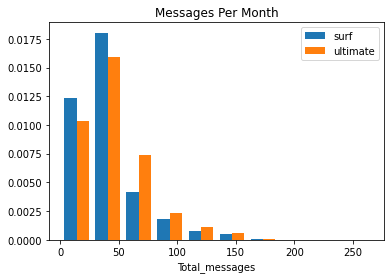

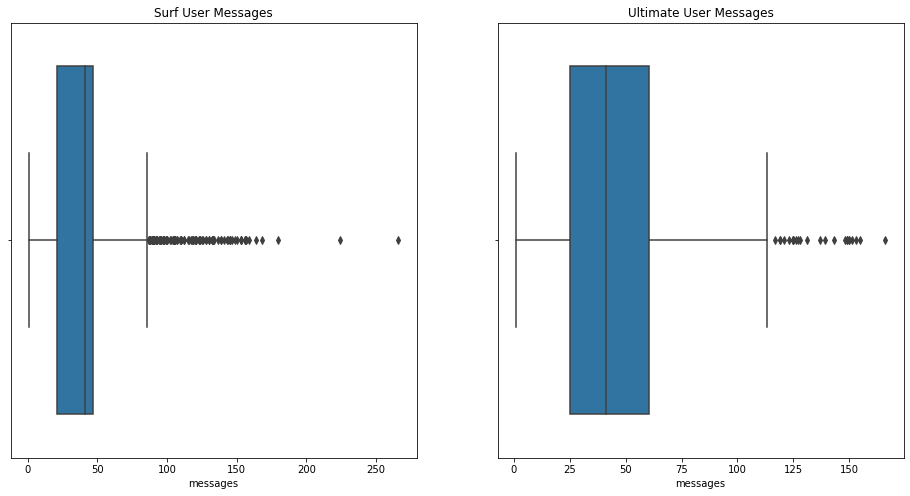

In [ ]:
# Membuat Perbanding Distribusi antara penggana surf dan ultimate di messages
# plt.hist([ultimate_user['messages_per_month'], surf_user['messages_per_month']],label= ['ultimate','surf'], density = True)
plt.hist([surf_user['messages'], ultimate_user['messages']], label= ['surf', 'ultimate'], density = True)
plt.legend()
plt.xlabel('Total_messages')
plt.title('Messages Per Month')

plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
sns.boxplot(data=surf_user , x='messages')
plt.title('Surf User Messages')

plt.subplot(1, 2, 2)
sns.boxplot(data=ultimate_user , x='messages')
plt.title('Ultimate User Messages')
plt.show()

- Diketahui bahwa melihat dari histogramnya bahwa pengguna surf dan ultimate mempunyai trend yang sama, yang dimana bahwa data distribusinya terpusat diantara 0 s/d 50 pesan untuk surf dan ultimate. Untuk surf dan ultimate bahwa rata-rata pesan yang dilakukan perbulannya lebih besar surf ketimbang ultimate untuk distribusi 0 s/d 50 pesan, dan setelah 50 pesan ke atas distribusi pengguna pesannya lebih banyak untuk user ultimate, hal ini dikarenakan batas pesan yang diberikan untuk surf hanya sampai 50 pesan saja.

- Untuk pengguna surf dan ultimate dimana trend distribusi datanya mempunyai kemiringan Positif yang artinya bahwa rata-rata lebih besar dari mediannya dan dibuktikan dengan histogram.

- Sedangkan di Boxplot bahwa kita dapat melihat perilkau konsumen untuk pengguna surf ternyata sangat banyak yang melewati batasnya yaitu 50 pesan perbulan, di banding ultimate yang diberikan 1000 tapi sangat sedikit untuk yang melakukan diatas 50 pesan perbulannya.

- Ada yang menarik pada paket ultimate bahwa para pelanggannya tidak ada yang menggunakan pada pesannya sampai lebih dari 1000 pesan, dan pelanggan yang mengirim pesannya paling banyak adalah pengguna surf yang melebihi sampai 250. Sedangkan ultimate hanya diatas 150 saja.

## Melihat Distribusi data antara Surf dan Ultimate untuk Call

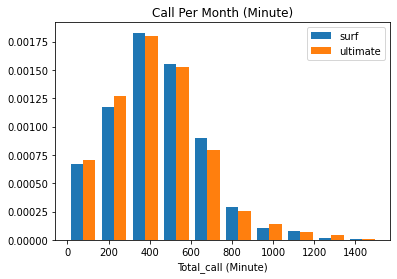

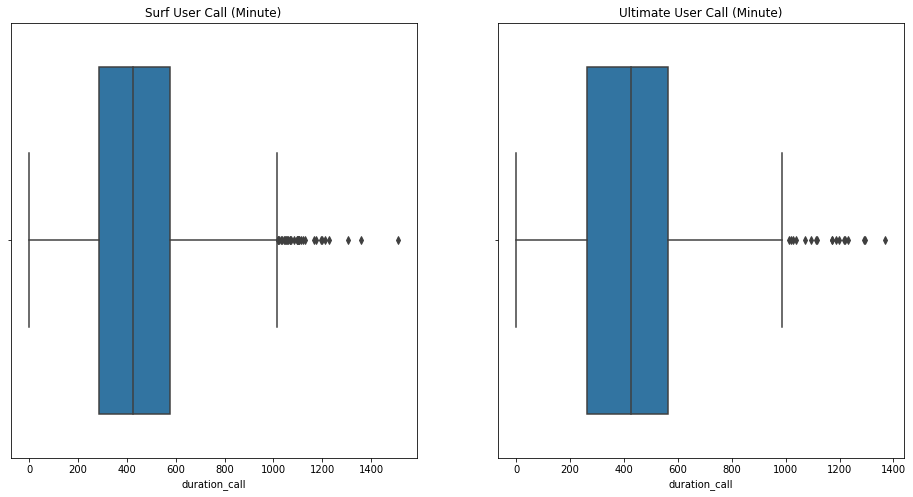

In [ ]:
# Membuat Perbanding Distribusi antara penggana surf dan ultimate di call
# plt.hist([ultimate_user['messages_per_month'], surf_user['messages_per_month']],label= ['ultimate','surf'], density = True)
plt.hist([surf_user['duration_call'], ultimate_user['duration_call']], label= ['surf', 'ultimate'], density = True)
plt.legend()
plt.xlabel('Total_call (Minute)')
plt.title('Call Per Month (Minute)')

plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
sns.boxplot(data=surf_user , x='duration_call')
plt.title('Surf User Call (Minute)')

plt.subplot(1, 2, 2)
sns.boxplot(data=ultimate_user , x='duration_call')
plt.title('Ultimate User Call (Minute)')
plt.show()

- Diketahui bahwa melihat dari histogramnya bahwa pengguna surf dan ultimate mempunyai trend yang sama, yang dimana bahwa data distribusinya terpusat diantara 200 s/d 600 menit panggilan untuk surf dan ultimate. Untuk surf dan ultimate bahwa rata-rata durasi panggilan yang dilakukan perbulannya lebih besar surf ketimbang ultimate untuk distribusi 200 s/d 600 menit.

- Untuk pengguna surf dan ultimate dimana trend distribusi datanya mempunyai kemiringan Positif yang artinya bahwa rata-rata lebih besar dari mediannya dan dibuktikan dengan histogram. 

- Sedangkan di Boxplot bahwa kita dapat melihat perilkau konsumen untuk pengguna surf ternyata sangat banyak yang melewati batasnya yaitu 500 menit perbulan bahkan ada yang diatas 1000 menit. Di banding ultimate yang diberikan 3000 menit tapi sedikit untuk yang melakukan bahkan tidak ada yang diatas 1500 menit.

- Ada yang menarik pada paket ultimate bahwa para pelanggannya tidak ada yang menggunakan pada faisilitas telepon tidak ada yang sampai lebih dari 3000 menit, dan pelanggan yang durasi panggilan paling banyak adalah pengguna surf yang melebihi sampai 1400 menit dengan jarak yang jauh dari titik 1400 menit, sedangkan ultimate tidak ada yang melebihi sampai 1400 menit.

## Melihat Distribusi data antara Surf dan Ultimate untuk Data

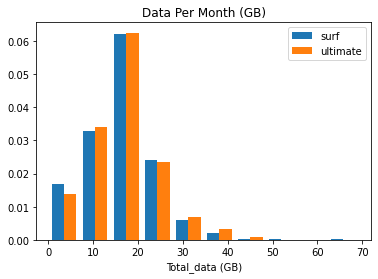

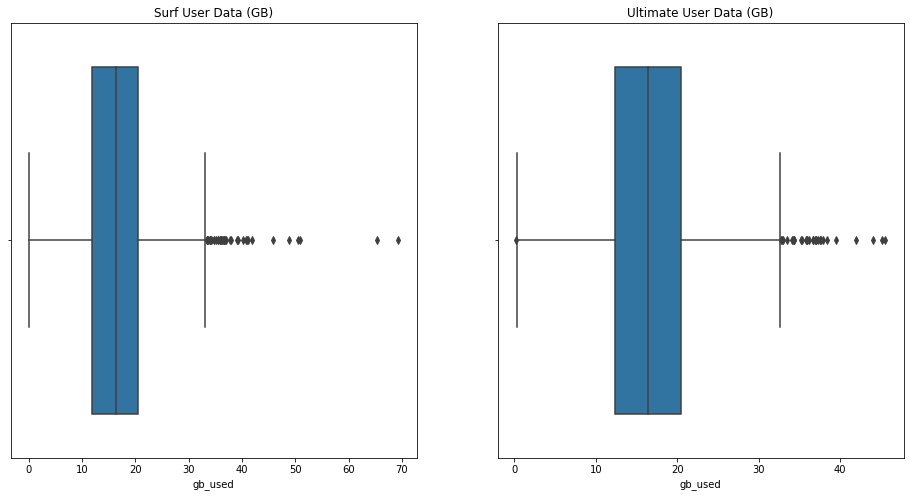

In [ ]:
# Membuat Perbanding Distribusi antara penggana surf dan ultimate di Data
# plt.hist([ultimate_user['messages_per_month'], surf_user['messages_per_month']],label= ['ultimate','surf'], density = True)
plt.hist([surf_user['gb_used'], ultimate_user['gb_used']], label= ['surf', 'ultimate'], density = True)
plt.legend()
plt.xlabel('Total_data (GB)')
plt.title('Data Per Month (GB)')

plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
sns.boxplot(data=surf_user , x='gb_used')
plt.title('Surf User Data (GB)')

plt.subplot(1, 2, 2)
sns.boxplot(data=ultimate_user , x='gb_used')
plt.title('Ultimate User Data (GB)')
plt.show()

- Diketahui bahwa melihat dari histogramnya bahwa pengguna surf dan ultimate mempunyai trend yang sama, yang dimana bahwa data distribusinya terpusat diantara 10 s/d 20 GB panggilan untuk surf dan ultimate. Untuk surf dan ultimate bahwa rata-rata GB data yang dilakukan perbulannya lebih besar ultimate ketimbang surf.

- Untuk pengguna surf dan ultimate dimana trend distribusi datanya mempunyai kemiringan Positif yang artinya bahwa rata-rata lebih besar dari mediannya dan dibuktikan dengan histogram.

- Sedangkan di Boxplot bahwa kita dapat melihat perilkau konsumen untuk pengguna surf ternyata sangat banyak yang melewati batasnya yaitu 15 GB data perbulan bahkan ada yang hampir 70 GB. Konsume paket ultimate ternyata juga sangat banyak yang melewati batasnya yaitu 30 GB.

- Ada yang menarik bahwa pada paket surf maupun ultimate, para penggunannya mempunyai sifat yang pemakaiannya melebih dari batasnya. 

# Melakukan Uji Hipotesis

Atasan meminta 2 permintaan terkait datanya, yaitu:

- Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf apakah berbeda atau sama.
- Rata-rata pendapatan dari pengguna di wilayah NY-NJ apakah berbeda atau sama dengan pendapatan pengguna dari wilayah lain.

karena dalam permintaanya diminta untuk membandingkan, maka metode yang digunakan adalah dengan hipotesis persamaan rata-rata dua populasi.

Sedangkan standar signifikasi (alpha) adalah : 5%.

Karena 5% adalah standar terbaiknya, kalau 1% atau 10% saya tidak memilihnya karena bukan dalam kondisi kritis atau kondisi yang kurang meyakinkan.

## Melihat Varians dari masing-masing data untuk di Uji Hipotesis

Sebelum melakukan uji hipotesis, sebaiknya melihar varian dari masing-masing data yang diperlukan agar nanti ketika memberi perintah untuk kodenya apakah varian nya sama atau tidak.

### Melihat Varians untuk Ultimate dan Surf

In [ ]:
# Melihat Varians total_income_per_month di surf
variance_income_surf = np.var(surf_user['total_income_per_month'])
variance_income_surf

3044.989982389027

In [ ]:
# Melihat Varians total_income_per_month di ultimate
variance_income_ultimate = np.var(ultimate_user['total_income_per_month'])
variance_income_ultimate

128.98115900003052

Melihat dari varian surf dan ultimate bahwa keduanya berbeda maka nanti dalam asumsi `equal_var` adalah `False`.

### Melihat Varians untuk wilayah NY-NJ dan wilayah selain NY-NJ

In [ ]:
# Memeriksa value count untuk NY-NJ
df['clean_city'].value_counts()

NY-NJ-PA       378
CA             363
TX             170
FL             113
IL-IN-WI        94
PA-NJ-DE-MD     82
MA-NH           71
MI              70
DC-VA-MD-WV     62
MN-WI           60
WA              53
AZ              50
CO              49
GA              49
OR-WA           44
NC-SC           44
OH              40
LA              40
OH-KY-IN        37
TN              35
KY-IN           34
IN              29
NY              29
OK              29
CT              28
SC              27
NV              26
PA              24
MD              22
HI              21
TN-MS-AR        16
MO-KS           16
VA              15
AL              15
NM              14
RI-MA           11
MO-IL           11
NC               8
UT               8
WI               7
VA-NC            6
NE-IA            3
Name: clean_city, dtype: int64

In [ ]:
# Membuat variabel baru untuk memisahkan antara NY-NJ dan bukan NY-NJ
NY_NJ = df.query('clean_city == "NY-NJ-PA"')
not_NY_NJ = df.query('clean_city != "NY-NJ-PA"')

In [ ]:
# Melihat Varians total_income_per_month di NY-NJ
variance_income_NY_NJ = np.var(NY_NJ['total_income_per_month'])
variance_income_NY_NJ

1885.7843645817588

In [ ]:
# Melihat Varians total_income_per_month di not NY-NJ
variance_income_not_NY_NJ = np.var(not_NY_NJ['total_income_per_month'])
variance_income_not_NY_NJ

2205.1835013118166

Melihat dari varian NY-NJ dan not-NY-NJ bahwa keduanya berbeda maka nanti dalam asumsi `equal_var` adalah `False`.

## Uji Hipotesis untuk Surf dan Ultimate

Karena diminta keterangan apakah pendapatan untuk pengguna paket Ultimate dan Surf sama atau tidak sama, maka adapun keterangan hipotesisnya pun seperti ini:

- **H0** : Bahwa pendapatan untuk pengguna paket Ultimate dan Surf adalah **SAMA**.

- **H1** : Bahwa pendapatan untuk pengguna paket Ultimate dan Surf adalah **TIDAK SAMA**.

In [ ]:
# Uji Hipotesis untuk income surf dan ultimate
alpha = 0.05
results_surf_ultimate = st.ttest_ind(ultimate_user['total_income_per_month'], surf_user['total_income_per_month'],equal_var=False)
print('p-value:', results_surf_ultimate.pvalue)

p-value: 4.420696484889164e-15


In [ ]:
#melihat bagaimana hasil statistik untuk income surf dan ultimate
if (results_surf_ultimate.pvalue < alpha):
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak dapat menolak hipotesis nol')

Kita menolak hipotesis nol


Pada hasil hipoteis tersebut bahwa kita menolak **H0**. Artinya bahwa pendapatan untuk ultimate dan surf adalah **TIDAK SAMA**.

Perlu dibuktikan dari rata-rata pendapatan perbulan untuk ultimate dan surf.

In [ ]:
# Pendapatan ultiamte per bulan
ultimate_user['total_income_per_month'].sum()

52346.0

In [ ]:
# Pendapatan surf per bulan
surf_user['total_income_per_month'].sum()

96031.18

Setelah melihat rata-rata pendapatan dari surf dan ultimate bahwa pendapatannya tidak sama, bahkan sangat jauh untuk perbedannya dimana ultimate lebih besar dari pada surf.

## Uji Hipotesis untuk wilayah NJ-NY dan wilayah selain NJ-NY

Karena diminta keterangan apakah pendapatan untuk pengguna untuk NY-NJ dan diluar NY-NJ sama atau tidak sama, maka adapun keterangan hipotesisnya pun seperti ini:

- **H0** : Bahwa pendapatan untuk pengguna di wilayah NJ-NY dan wilayah selain NJ-NY adalah **SAMA**.

- **H1** : Bahwa pendapatan untuk pengguna di wilayah NJ-NY dan wilayah selain NJ-NY adalah **TIDAK SAMA**.

In [ ]:
# Uji Hipotesis untuk income NY-NJ dan not-NY-NJ
alpha = 0.05
results_NJ_NY = st.ttest_ind(NY_NJ['total_income_per_month'], not_NY_NJ['total_income_per_month'],equal_var=False)
print('p-value:', results_NJ_NY.pvalue)

p-value: 0.03108145626390683


In [ ]:
#melihat bagaimana hasil statistik
if (results_NJ_NY.pvalue < alpha):
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak dapat menolak hipotesis nol')

Kita menolak hipotesis nol


ada hasil hipoteis tersebut bahwa kita menolak **H0**. Artinya bahwa pendapatan untuk wilayah di NJ-NY dan wilayah selain NJ-NY adalah **TIDAK SAMA**.

Perlu dibuktikan dari rata-rata pendapatan perbulan untuk wilayah di NJ-NY dan wilayah selain NJ-NY.

In [ ]:
# Pendapatan untuk wilayah NJ-NY per bulan
NY_NJ['total_income_per_month'].sum()

22660.35

In [ ]:
# Pendapatan untuk wilayah NJ-NY per bulan
not_NY_NJ['total_income_per_month'].sum()

125716.83

Setelah melihat rata-rata pendapatan dari untuk wilayah di NJ-NY dan wilayah selain NJ-NY bahwa pendapatannya tidak sama, bahkan sangat jauh untuk perbedannya dimana wilayah selain NJ-NY lebih besar daripada wilayah di NJ-NY.

# Ringakasan, Hasil, Kesimpulan, Saran, & Rekomendasi 

## Ringkasan

Untuk mengetahui paket mana yang memberikan pendapatan yang lebih besar bagi perusahaan operator telekomunikasi Megaline dengan 5 dataset yang berisi informasi berbeda-beda. Pada tahap awal yaitu melihat seluruh informasi yang dibutuhkan untuk analisis dan tahap selanjutnya. Tahap kedua, yaitu mengubah tipe data pada tanggal untuk masing-masing tabel yang membutuhkan. Selanjutnya mengisi nilai hilang pada tanggal yang berhenti untuk langganan sesuai dengan analisis dan ketentuan saya. Mengecek value untuk berjaga-jaga kalau ada value yang tidak sesuai. Tahap selanjutnya yaitu menambah kolom baru untuk bulan pada masing-masing tabel, membaut kolom untuk jumlah berapa lama pelanggan berlangganan, dan membulatkan nilai desimal sesuai dengan ketentuan untuk proses tahap selanjutnya. Selanjutnya yaitu membaut kolom baru untuk kota NJ-NY yang dimana menganalisis perbedaan pendapatan antara wilayah NJ-NY dan wilayah selain NJ-NY.

Tahap berikutnya yaitu aggregasi tabel `calls`, `messages`, dan `internet`. Setelah itu menggabungkan masing-masing tabel untuk dijadikan 1 tabel agar mudah untuk analsis selanjutnya. Selanjutnya yaitu mengecek kembali untuk nilai hilang dan mengisi sesuai ketentuan. lalu mengidentifikasi untuk masing-masing `calls`, `messages`, dan `internet` dalam perbulannya dan mengkonversi nilai-nilai yang dibutuhkannya. Tahap selanjutnya yaitu menghitung untuk pelanggan yang menggunakan layanannya diatas batas ketentuan masing-masing paket dan mengenakan biaya tambahan sesuai ketentuan.

Tahap berikutnya yaitu Eksplorasi data dengan melihat distribusi histogram dan boxplot serta melihat rata-rata, varian, dan standar deviasi lalu menjelaskan/mendeskripsikan distribusi datanya. Tahap selanjutnya yaitu menguji hipotesis untuk pendapatan pada paket `surf` dan `ultimate` di `calls`, `messages`, dan `internet`. menguji hipotesis untuk pendapatan pada wilayah NJ-NY dan wilayah selain NJ-NY.

Tahap terakhir yaitu menulis ringkasa untuk penejelasan tahap-tahapnya, menjelaskan hasil dari uji hipotesis, memberi kesimpulan dari uji hipotesisnya, memberi saran, serta memberi rekomendasi untuk kedepannya bagaimana penyesuaian anggaran iklan untuk paket yang memberikan pendapatan yang tinggi.

## Hasil

Untuk hasil bahwa paket surf tidak sama pendapatannya dengan ultimate yang dimana surf lebih besar dan bisa memberikan 96031.18 USD perbulannya, sedangkan ultiamte hanya bisa memberikan 33433.89 USD saja perbulannya.

Untuk hasil bahwa pendapatan di wilayah NJ-NY tidak sama dengan yang pendapatan di luar wilayah NJ-NY yang dimana untuk wilayah NJ-NY hanya memberikan 22660.35 USD perbulannya, sedangkan wilayah di luar NJ-NY dapat memberikan 125716.83 USD perbulannya.

## Kesimpulan

Bahwa paket surf dapat memberikan pendaptan yang lebih besar di banding paket ultimate untuk setiap bulannya, dan itu bisa dilihat dari banyak pelanggan paket surf harus membayar lebih karena pemakaian paketnya diatas kuota masing-masing fasilitasnya. Sedangkan Ultimate tidak banyak pemakaiannya dan jarang yang pemakaian paketnya diatas kuota untuk masing-masing fasilitasnya.

Pendapatan diwilayah selain NJ-NY memberikan pendapatan yang sangat besar dibanding pendapatan diwilayah NJ-NY sendiri, meskipun pelanggan paling banyak berasal dari wilayah NJ-NY itu sendiri tetapi tidak dapat memberikan pendapatan yang banyak selain di wilayah luar NJ-NY.

## Saran

Untuk paket Surf dan Ultiamte bahwa paket yang dapat memberikan pendapatan yang tinggi yaitu Surf, hal itu bisa dilihat dari banyak pelanggan yang menggunakan paket Surf ditambah dengan para penggunanya banyak yang membayar biaya tambahan untuk masing-masing fasilitasnya. Dibanding Ultiamte yang tidak dapat banyak memberi pendapatan bagi perusahaan. Jenis paket yang lebih baik diiklankan lebih banyak yaitu Surf dibanding Ultimate.

Untuk pendapatan wilayah bahwa di luar NJ-NY dapat memberikan lebih banyak pendapatan dibanding wilayah NJ-NY itu sendiri, meskipun banyak pelanggan terbanyak ada di wilayah NJ-NY untuk berlangganan paket data Surf maupun Ultimate. Sebaiknya untuk daerah yang ditentukan untuk iklan paketnya lebih baik difokuskan di wilayah luar NJ-NY karena dapat memberi pendatapan lebih banyak lagi.


## Rekomendasi

Adapun rekomendasi untuk Departemen Periklanan bahwa sebaiknya untuk penyesuaian anggaran iklan lebih baik iklan Surf dan Ultimate di kombinasikan dengan wilayah yang ada di NJ-NY dan wilayah diluar NJ-NY secara bersamaan. Karena itu akan memberikan efisien untuk iklan agar nanti iklan yang didistribusikan lebih optimal.

Contoh: Paket Surf di kombinasikan dengan wilayah luar NJ-NY. Bahwa perusahaan Megaline ingin memperluas dengan eksplorasi untuk pelanggan baru di luar NJ-NY yang masih belum terjangkau dengan mengiklankan paket yang dimana biaya untuk berlangganan sangat murah dengan paket yang menggiurkan seperti Surf.

Dengan contoh itu, bahwa cara mengiklankan paket dengan kelebihan dan kekurangan masing-masing data akan lebih membuat anggaran yang disesuaikan jauh lebih efisien karena bisa memberi dampak yang lebih signifikan untuk pendapatan yang jauh lebih besar lagi.